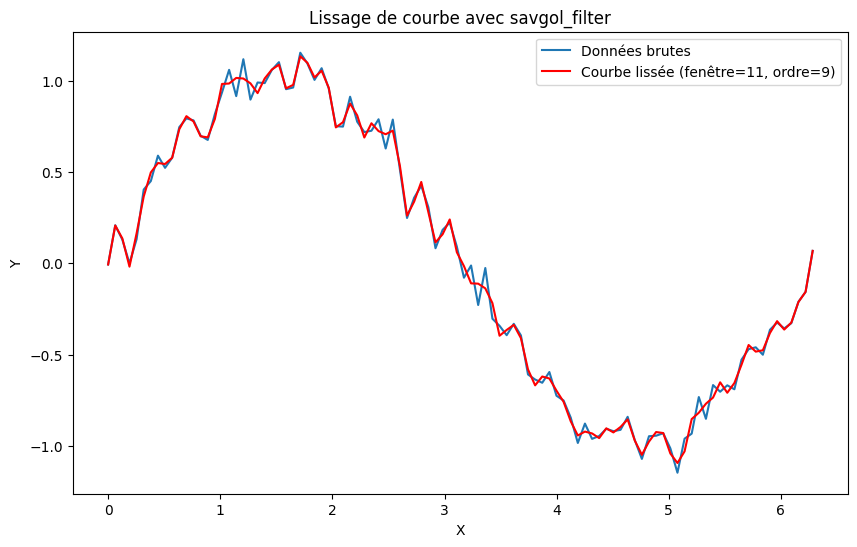

In [1]:
### GOAL IS TO TRY DIFFERENTS PARAMETERS TO SMOOTH SIGNAL, PSTH IN THIS CASE
#SMOOTHING
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
# Exemple de données
x = np.linspace(0, 2 * np.pi, 100)
y = np.sin(x) + np.random.normal(0, 0.1, size=len(x))  # Ajouter un peu de bruit
# Paramètres du lissage
window_size = 11
order = 9
# Appliquer le lissage avec savgol_filter
y_smooth = savgol_filter(y, window_size, order)
# Tracer les données brutes et la courbe lissée
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Données brutes')
plt.plot(x, y_smooth, label=f'Courbe lissée (fenêtre={window_size}, ordre={order})', color='red')
plt.legend()
plt.title('Lissage de courbe avec savgol_filter')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [ ]:
def smoothing(data,window_size,order):
    # window_size = 11
    # order = 9
    return savgol_filter(data, window_size, order)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def moving_average(x, window_size):
    return np.convolve(x, np.ones(window_size)/window_size, mode='same')

# Générer des données aléatoires avec du bruit
x = duration
y = Rotation['first']['CW'][1]

# Lissage avec moyenne mobile
smoothed_y = moving_average(y, window_size=5)

# Tracer les données brutes et lissées
plt.plot(x, y, label='Données brutes')
plt.plot(x, smoothed_y, label='Données lissées')
plt.legend()
plt.show()

In [ ]:
# if os.path.exists(os.path.join(parent_folder, exp_id+'_time.mat')):
#     time_m = h5py.File(os.path.join(parent_folder,exp_id+'_time.mat'),'r')
#     time = time_m['data']
# else:
#     print('time.dat file does not exist')
#     time = np.arange(len(ref)) / f_sampling

In [ ]:
dref = np.diff(ref)
dref = np.insert(dref, 0, 0)

position_max = np.where(ref==1)[0]

pic_position = [position_max[i] for i in range(1,len(position_max)) if position_max[i] != position_max[i - 1] + 1]

stock = []
stock[:] = pic_position[:]

for position in range(len(pic_position) - 2, 0, -1):
    if pic_position[position] - pic_position[position-1] < 3*f:
        del stock[position]

pic_position[:] = stock[:]

Ntrial = len(pic_position)

print('Number of trials :',Ntrial)
pic_position

In [ ]:
import sys

sys.path.append(r'D:\Abdussamed workspace\Python')

import testscript

In [ ]:
testscript.plots()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Créer des données aléatoires pour le heatmap (une matrice 10x10)
data = np.random.rand(100, 100)

# Afficher le heatmap
plt.imshow(data, cmap='Greys', interpolation='nearest')
plt.colorbar()  # Ajouter une barre de couleur pour référence
plt.show()

# viridis ; noir au jaune en passant par le bleu
# plasma ; bleu au jaune
# inferno ; noir au jaune
# magma : noir au jaune
# cividis ; pour daltonisme
# coolwarm ; pour rouge + et bleu -
# jet 
# Greys

In [ ]:
plt.axvspan(1, 2, color='lightblue', alpha=0.5)